In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import stats
from scipy import spatial
import gaussian
import matplotlib.pyplot as plt

In [2]:
# Import training data

train = np.genfromtxt('data/trn_data.csv', delimiter=',',skip_header=True)
print train[:5], train.shape

[[  40.582 -119.79    84.929]
 [  41.983 -123.6     87.388]
 [  41.85  -123.97    36.259]
 [  42.07  -123.01    84.913]
 [  41.953 -121.58    66.445]] (414, 3)


In [3]:
stats.describe(train[:,-1])

DescribeResult(nobs=414, minmax=(3.1692999999999998, 134.25), mean=70.239483816425121, variance=717.7203728115777, skewness=-0.14928497285720768, kurtosis=-0.7441244511130987)

In [4]:
# Import test data

test = np.genfromtxt('data/tst_locations.csv', delimiter=',',skip_header=True)
print test[:5], test.shape

[[  41.988 -123.72 ]
 [  41.883 -124.13 ]
 [  41.833 -123.83 ]
 [  41.999 -121.7  ]
 [  41.928 -122.44 ]] (413, 2)


In [5]:
# Create model object from training data

kriging = gaussian.SimpleKriging(training_data=train)

In [6]:
# Return prediction means for test data from trained model

predict = kriging.predict(test_data=test, l=.5, sigma=.2)
predict[:5]

array([[ 70.94340417],
       [ 23.70437824],
       [ 49.57131344],
       [ 71.06713418],
       [ 70.69029366]])

In [7]:
# Simulate
coords = np.concatenate((train[:, :-1], test), axis=0)
coords[:5,:]

array([[  40.582, -119.79 ],
       [  41.983, -123.6  ],
       [  41.85 , -123.97 ],
       [  42.07 , -123.01 ],
       [  41.953, -121.58 ]])

In [8]:
bounding_box = [coords[:,0].min(), coords[:,0].max(), coords[:,1].min(), coords[:,1].max()]
print bounding_box

[32.604999999999997, 42.07, -124.25, -114.48999999999999]


In [9]:
simulate = kriging.simulate(bbox=bounding_box, 
                            ncells=50, 
                            l=1.95, 
                            sigma=0.2, 
                            indices=False)

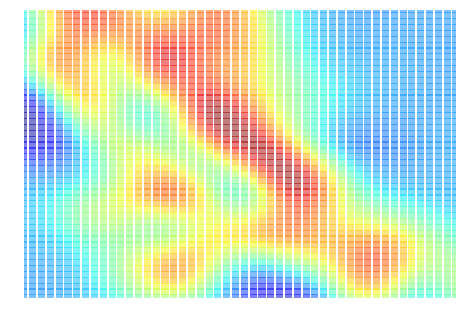

In [10]:
viz = kriging.simulate(bbox=bounding_box, 
                       ncells=50, 
                       l=1.05, 
                       sigma=0.195, 
                       indices=True, 
                       show_visual=False, 
                       save_kml='sim')

In [11]:
grid = gaussian.make_grid(bounding_box, 50)

In [12]:
grid

array([[  42.07      , -114.49      ],
       [  41.87683673, -114.49      ],
       [  41.68367347, -114.49      ],
       ..., 
       [  32.99132653, -124.25      ],
       [  32.79816327, -124.25      ],
       [  32.605     , -124.25      ]])

In [13]:
bounding_box

[32.604999999999997, 42.07, -124.25, -114.48999999999999]

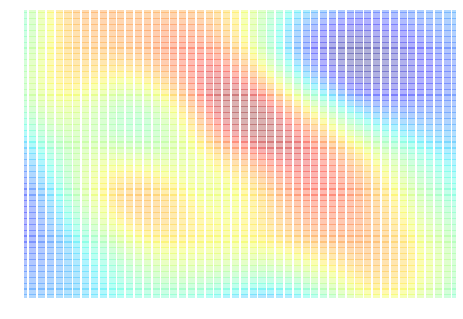

In [14]:
fig, ax = plt.subplots(1)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
y = grid[:, 0]
x = grid[:, 1]

ax.scatter(x, y, c=simulate, s=50, edgecolors='', marker='s', alpha=0.3)
# ax.axis('tight')
ax.axis([bounding_box[2], bounding_box[3], bounding_box[0], bounding_box[1]])
ax.axis('off')
plt.savefig('sim.png')

In [15]:
import simplekml

In [16]:
bounding_box

[32.604999999999997, 42.07, -124.25, -114.48999999999999]

In [17]:
kml = simplekml.Kml()
ground = kml.newgroundoverlay(name='GroundOverlay')
ground.icon.href = 'sim.png'
ground.latlonbox.north = bounding_box[1]
ground.latlonbox.south = bounding_box[0]
ground.latlonbox.east =  bounding_box[3]
ground.latlonbox.west =  bounding_box[2]
kml.save("GroundOverlay.kml")